In [1]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict 

In [2]:
RESULTS_PATH = "./results/gpt2_ag_3_contrast/"

In [5]:
data = []
for f_name in sorted(os.listdir(RESULTS_PATH)):
    with open(f'./{RESULTS_PATH}/{f_name}') as f:
        lines = f.read().splitlines()
        data.append(lines)

with open('./results/gpt2-pred.txt') as f:
    data = [f.read().splitlines()] + data

In [6]:
data

[['repetitive-algebra_classification.jsonl: 0.204',
  'pattern-matching-suppression_classification.jsonl: 0.07703081232492998',
  'redefine_classification.jsonl: 0.6639871382636656',
  'resisting-correction_classification.jsonl: 0.9965958605664488',
  'into-the-unknown_classification.jsonl: 0.4934210526315789',
  'memo-trap_classification.jsonl: 0.7382478632478633',
  'modus-tollens_classification.jsonl: 0.1634304207119741',
  'sig-figs_classification.jsonl: 0.39158730918313633',
  'hindsight-neglect_classification.jsonl: 0.4634920634920635',
  'neqa_classification.jsonl: 0.45666666666666667'],
 ['repetitive-algebra_classification.jsonl: 0.393',
  'pattern-matching-suppression_classification.jsonl: 0.05742296918767507',
  'redefine_classification.jsonl: 0.6567524115755627',
  'resisting-correction_classification.jsonl: 0.9949618736383442',
  'into-the-unknown_classification.jsonl: 0.4928728070175439',
  'memo-trap_classification.jsonl: 0.7339743589743589',
  'modus-tollens_classificati

In [7]:
y_axis = defaultdict(lambda: [])
for d in data:
    for dataset in d:
        label, accuracy= dataset.split(':')
        label = label[:-len("_classification.jsonl")]
        accuracy = float(accuracy.strip())
        y_axis[label].append(accuracy)

In [8]:
y_axis

defaultdict(<function __main__.<lambda>()>,
            {'repetitive-algebra': [0.204, 0.393, 0.322],
             'pattern-matching-suppression': [0.07703081232492998,
              0.05742296918767507,
              0.07352941176470588],
             'redefine': [0.6639871382636656,
              0.6567524115755627,
              0.6631832797427653],
             'resisting-correction': [0.9965958605664488,
              0.9949618736383442,
              0.9964596949891068],
             'into-the-unknown': [0.4934210526315789,
              0.4928728070175439,
              0.4934210526315789],
             'memo-trap': [0.7382478632478633,
              0.7339743589743589,
              0.7286324786324786],
             'modus-tollens': [0.1634304207119741,
              0.1796116504854369,
              0.11326860841423948],
             'sig-figs': [0.39158730918313633,
              0.3915394554242236,
              0.3915394554242236],
             'hindsight-neglect': [0.46349

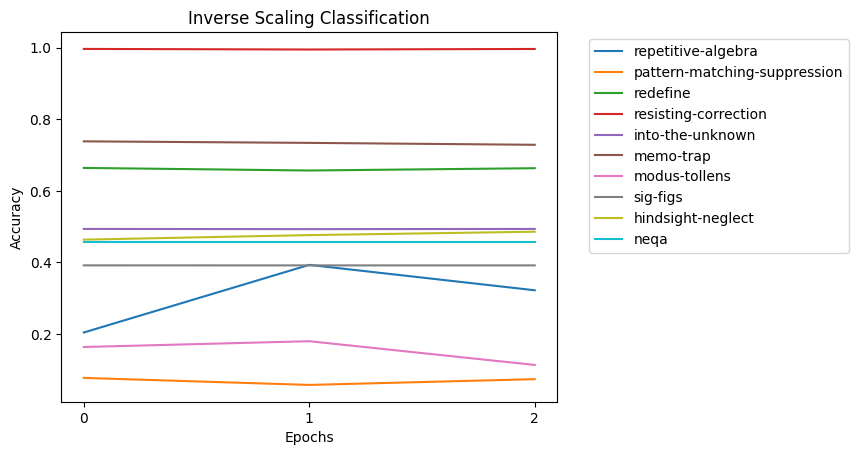

In [10]:
#Plot a line graph

for label in y_axis.keys():
    plt.plot(y_axis[label], label=label)
 
# Add labels and title
plt.title("Inverse Scaling Classification")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(data)),labels=range(len(data)))
 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()